# Unemployment Rate Data Analysis

Author: Kexin Li, kexil17@uci.edu

Course Project, UC Irvine, Math 10, S22

## Section 1: Introduction

During the pandemic, people around the world have been affected greatly. In this data analysis project, I will present the correlation between the unemployment rate and the covid cases confirmed as a measurement of impact from the pandemic. Specifically, I used the strategy of pandas, Altair Chart, Matplotlib, and Random Forest Regression for the analysis and visualization.

## Section 2: Clean Dataset & Overview

* The first step is to load the data with the imported packages. The data I will be utilizing and analyzing is the unemployment rate in the US during the pandemic and the Covid data accordingly. Here I use pandas to create dataframes of these two datasets, including the strategy of reading csv files, converting the object form of the date into datetime type, and rescaling with groupby and merge.

In [ ]:
# import package 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

### 1. The Unemployment Rate

* For the unemployment rate, the data is read by pandas from the file `unemployment_rate_data.csv`. The data covers the US unemployment rate before and during the pandemic from the perspective of whole country.

* In order for easier execution of the months and years data, here I used the `pd.to_datetime` skill to convert the forms into datetime data.

In [ ]:
#read the csv data & clean the dataset
df = pd.read_csv('unemployment_rate_data.csv')
df.dropna(inplace = True)

In [ ]:
#convert the date column into datetime type
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [ ]:
df

,date,unrate,unrate_men,unrate_women,unrate_16_to_17,unrate_18_to_19,unrate_20_to_24,unrate_25_to_34,unrate_35_to_44,unrate_45_to_54,unrate_55_over,year,month
0,1948-01-01,4.0,4.2,3.5,10.8,9.6,6.6,3.6,2.6,2.7,3.6,1948,1
1,1948-02-01,4.7,4.7,4.8,15.0,9.5,8.0,4.0,3.2,3.4,4.0,1948,2
2,1948-03-01,4.5,4.5,4.4,13.2,9.3,8.6,3.5,3.2,2.9,3.5,1948,3
3,1948-04-01,4.0,4.0,4.1,9.9,8.1,6.8,3.5,3.1,2.9,3.2,1948,4
4,1948-05-01,3.4,3.3,3.4,6.4,7.2,6.3,2.8,2.5,2.3,2.9,1948,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,2021-07-01,5.7,5.5,5.8,12.8,9.9,9.5,6.3,4.8,4.0,4.6,2021,7
883,2021-08-01,5.3,5.1,5.5,10.7,11.0,9.1,5.8,4.4,4.2,4.1,2021,8
884,2021-09-01,4.6,4.6,4.5,9.2,12.6,7.7,5.0,3.8,3.7,3.3,2021,9
885,2021-10-01,4.3,4.2,4.4,8.6,12.7,6.8,4.5,3.6,3.5,3.3,2021,10


### 2. The Covid Data For Comparison and Correlational Analysis

* For the covid dataset, the data is read by pandas from the file `us-counties.csv`. This datasets includes a huge amount of `nan` data because of the absence of information. Therefore, an important step before analyzing the dataset is to clean the data with the strategy of `dropna` which is to drop or delete the rows with the missing values. 

In [ ]:
#read the csv data & clean the dataset
covid_df = pd.read_csv("./us-counties.csv")
covid_df.dropna(inplace = True)

#convert the date column into datetime type
covid_df['date'] = pd.to_datetime(covid_df['date'] )
covid_df['year'] = covid_df['date'].dt.year
covid_df['month'] = covid_df['date'].dt.month
covid_df['day'] = covid_df['date'].dt.day

covid_df

,date,county,state,fips,cases,deaths,year,month,day
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0,2020,1,21
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0,2020,1,22
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0,2020,1,23
3,2020-01-24,Cook,Illinois,17031.0,1,0.0,2020,1,24
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0,2020,1,24
...,...,...,...,...,...,...,...,...,...
2502827,2022-05-13,Sweetwater,Wyoming,56037.0,11088,126.0,2022,5,13
2502828,2022-05-13,Teton,Wyoming,56039.0,10074,16.0,2022,5,13
2502829,2022-05-13,Uinta,Wyoming,56041.0,5643,39.0,2022,5,13
2502830,2022-05-13,Washakie,Wyoming,56043.0,2358,44.0,2022,5,13


### 3. Merging and rearranging the data

* As the above cleaned datasets presented, they have the similar date column which is a clue for further merging the datasets together with rescaling the index.

In [ ]:
#Use groupby method to rearrage the dataframe
#merge the new monthly confirmed cases into the dataframe
mask = covid_df['day'] == 1
monthly_df = covid_df[mask].groupby(['date'])[['cases', 'deaths']].sum()

In [ ]:
#merge the new monthly confirmed cases into the dataframe
monthly_new_df = monthly_df.diff().dropna().reset_index()
df = pd.merge(df, monthly_new_df, on = 'date', how = 'left')
df = df.fillna(0)
df = df.tail(60)

In [ ]:
# Use boolean series to determine whether the date is during the pandemic
df['is_covid_period'] = 0
df.loc[df['year'] > 2019, 'is_covid_period'] = 1

* Intuitively, the covid must have an impact on the unemployment rate during the pandemic. Therefore, to confirm the intuitive guess, I checked the correlation data of the unemployment rate `unrate` and the `cases` and `deaths`.

In [ ]:
# all periods
df.corr()

,unrate,unrate_men,unrate_women,unrate_16_to_17,unrate_18_to_19,unrate_20_to_24,unrate_25_to_34,unrate_35_to_44,unrate_45_to_54,unrate_55_over,year,month,cases,deaths,is_covid_period
unrate,1.000000,0.992835,0.993773,0.702686,0.879933,0.989326,0.992259,0.988000,0.993118,0.995994,0.405066,-0.127066,0.273468,0.442132,0.617641
unrate_men,0.992835,1.000000,0.973893,0.680491,0.855213,0.977824,0.987839,0.992651,0.987953,0.989174,0.423488,-0.176127,0.316872,0.480783,0.642299
unrate_women,0.993773,0.973893,1.000000,0.718747,0.896557,0.987683,0.983364,0.970567,0.985295,0.989885,0.376863,-0.084732,0.226632,0.397828,0.579881
unrate_16_to_17,0.702686,0.680491,0.718747,1.000000,0.782091,0.732523,0.655998,0.643953,0.670056,0.687104,-0.111090,-0.279998,-0.188296,0.002603,0.039028
unrate_18_to_19,0.879933,0.855213,0.896557,0.782091,1.000000,0.898318,0.846724,0.829689,0.869548,0.875187,0.159204,-0.152230,0.085488,0.232566,0.348556
unrate_20_to_24,0.989326,0.977824,0.987683,0.732523,0.898318,1.000000,0.973729,0.965301,0.978499,0.983438,0.386584,-0.147002,0.198203,0.379478,0.577854
unrate_25_to_34,0.992259,0.987839,0.983364,0.655998,0.846724,0.973729,1.000000,0.983383,0.982577,0.986767,0.419075,-0.121325,0.286187,0.456472,0.639279
unrate_35_to_44,0.988000,0.992651,0.970567,0.643953,0.829689,0.965301,0.983383,1.000000,0.983791,0.984143,0.447436,-0.136148,0.359781,0.518589,0.671682
unrate_45_to_54,0.993118,0.987953,0.985295,0.670056,0.869548,0.978499,0.982577,0.983791,1.000000,0.990115,0.431261,-0.115749,0.299824,0.452018,0.633074
unrate_55_over,0.995994,0.989174,0.989885,0.687104,0.875187,0.983438,0.986767,0.984143,0.990115,1.000000,0.410699,-0.099223,0.279683,0.440068,0.619170


*  They are both positively correlated, which is a clear indication that as covid confirmed cases and death cases go up, the unemployment rate is increasing accordingly.

*  Also, a more simplified way to look at the relationship is between the unemployment rate and the `is_covid_period` column. As the data presents, the correlation coeffiecient is 0.617 between the `unrate` and `is_covid_period`. Therefore, unemployment rate is greatly affected by the covid.

In [ ]:
mask = df['is_covid_period'] == 1
# non COVID-19 periods
df[~mask].corr()

,unrate,unrate_men,unrate_women,unrate_16_to_17,unrate_18_to_19,unrate_20_to_24,unrate_25_to_34,unrate_35_to_44,unrate_45_to_54,unrate_55_over,year,month,cases,deaths,is_covid_period
unrate,1.000000,0.922827,0.872502,0.568118,0.491396,0.838257,0.900620,0.911569,0.918524,0.926398,-0.619124,-0.512670,NaN,NaN,NaN
unrate_men,0.922827,1.000000,0.629195,0.512311,0.381607,0.785622,0.896674,0.910956,0.845951,0.873056,-0.546256,-0.580615,NaN,NaN,NaN
unrate_women,0.872502,0.629195,1.000000,0.483368,0.554975,0.713592,0.722394,0.708231,0.817016,0.793420,-0.552225,-0.321590,NaN,NaN,NaN
unrate_16_to_17,0.568118,0.512311,0.483368,1.000000,0.165949,0.460803,0.397051,0.421073,0.459137,0.481474,-0.262259,-0.484003,NaN,NaN,NaN
unrate_18_to_19,0.491396,0.381607,0.554975,0.165949,1.000000,0.577586,0.407107,0.307980,0.363133,0.393525,-0.288806,-0.300508,NaN,NaN,NaN
unrate_20_to_24,0.838257,0.785622,0.713592,0.460803,0.577586,1.000000,0.637537,0.691131,0.734876,0.739098,-0.354657,-0.521619,NaN,NaN,NaN
unrate_25_to_34,0.900620,0.896674,0.722394,0.397051,0.407107,0.637537,1.000000,0.855720,0.822227,0.833318,-0.643638,-0.451608,NaN,NaN,NaN
unrate_35_to_44,0.911569,0.910956,0.708231,0.421073,0.307980,0.691131,0.855720,1.000000,0.830377,0.877003,-0.647958,-0.423222,NaN,NaN,NaN
unrate_45_to_54,0.918524,0.845951,0.817016,0.459137,0.363133,0.734876,0.822227,0.830377,1.000000,0.806513,-0.474194,-0.524395,NaN,NaN,NaN
unrate_55_over,0.926398,0.873056,0.793420,0.481474,0.393525,0.739098,0.833318,0.877003,0.806513,1.000000,-0.612782,-0.418922,NaN,NaN,NaN


In [ ]:
# non COVID-19 periods
df[mask].corr()

,unrate,unrate_men,unrate_women,unrate_16_to_17,unrate_18_to_19,unrate_20_to_24,unrate_25_to_34,unrate_35_to_44,unrate_45_to_54,unrate_55_over,year,month,cases,deaths,is_covid_period
unrate,1.000000,0.995509,0.996949,0.917385,0.929509,0.991414,0.992617,0.992582,0.992206,0.996418,-0.456949,-0.059315,-0.212334,0.018821,NaN
unrate_men,0.995509,1.000000,0.985268,0.913238,0.919998,0.983653,0.985936,0.995323,0.990204,0.993264,-0.449641,-0.099191,-0.172898,0.060271,NaN
unrate_women,0.996949,0.985268,1.000000,0.916873,0.933444,0.991563,0.990667,0.983522,0.987213,0.992822,-0.458010,-0.028699,-0.241022,-0.013189,NaN
unrate_16_to_17,0.917385,0.913238,0.916873,1.000000,0.919721,0.936070,0.886839,0.902213,0.894981,0.906018,-0.474153,-0.212427,-0.308188,-0.038079,NaN
unrate_18_to_19,0.929509,0.919998,0.933444,0.919721,1.000000,0.933978,0.898636,0.906677,0.930053,0.927583,-0.532238,-0.130644,-0.202605,-0.017246,NaN
unrate_20_to_24,0.991414,0.983653,0.991563,0.936070,0.933978,1.000000,0.979034,0.975716,0.979879,0.984843,-0.469601,-0.103901,-0.285176,-0.042752,NaN
unrate_25_to_34,0.992617,0.985936,0.990667,0.886839,0.898636,0.979034,1.000000,0.982968,0.978682,0.986470,-0.453012,-0.048832,-0.220712,0.017901,NaN
unrate_35_to_44,0.992582,0.995323,0.983522,0.902213,0.906677,0.975716,0.982968,1.000000,0.987156,0.989341,-0.395351,-0.061813,-0.135662,0.096793,NaN
unrate_45_to_54,0.992206,0.990204,0.987213,0.894981,0.930053,0.979879,0.978682,0.987156,1.000000,0.991470,-0.450237,-0.028389,-0.187627,0.017476,NaN
unrate_55_over,0.996418,0.993264,0.992822,0.906018,0.927583,0.984843,0.986470,0.989341,0.991470,1.000000,-0.467218,-0.039319,-0.202735,0.013083,NaN


## Section 3: Altair Charts: Which year was more severe, 2020 or 2021?

* An important technique to analyze data is to visualize it. In this section, therefore, several altair charts will be presented as tools of visualization.

* The first two charts are relatively simple and can be treated as graphs showing the correlation details mentioned in Section 2.

In [ ]:
alt.Chart(df[mask]).mark_point().encode(x = 'cases', y = 'unrate')

alt.Chart(...)

In [ ]:
alt.Chart(df[mask]).mark_point().encode(x = 'deaths', y = 'unrate')

alt.Chart(...)

* The second Altair Chart is with multi-line tooltip function. That is to say, if the mouse is stayed in the chart, the chart will automatically display the neearest point from the mouse to present the according `unrate` value. 

In [ ]:
# Create a selection that chooses the nearest point & selects based on x-value
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['unrate'], empty='none')

# The basic line
line = alt.Chart(df).mark_line(interpolate='basis').encode(
    x='cases:Q',
    y='unrate:Q',
    color='year:N'
)

# Transparent selectors across the chart
selectors = alt.Chart(df).mark_point().encode(
    x='cases:Q',
    opacity=alt.value(0),
).add_selection(
    nearest
)

# Draw points on the line
points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

# Draw text labels near the points
text = line.mark_text(align='left', dx=5, dy=-5).encode(
    text=alt.condition(nearest, 'unrate:Q', alt.value(' '))
)

# Draw a rule at the location of the selection
rules = alt.Chart(df).mark_rule(color='gray').encode(
    x='cases:Q',
).transform_filter(
    nearest
)

# Put the five layers into a chart and bind the data
alt.layer(
    line, selectors, points, rules, text
).properties(
    width=600, height=400
)

alt.LayerChart(...)

* As the above chart shows, only the 2020 and 2021 lines are displayed because before 2020 there are no data related to the `cases` as the covid was not prevailed. Thus, although the maximum and minimum cases in 2021 are both larger than those in 2020, it is less affected in terms of the unemployment rate as the fluctuation and unemployment rate are significantly lower. Also, the maximum unemployment rate is in 2020. 

* The other way of displaying the data is the altair chart with detail selection function. This is a strategy of presenting the chart in a general chart on one side and after a click on the points, the related detailed data will be shown on the other side.

In [ ]:
# make a chart

selector = alt.selection_single(empty='all', fields=['year'])

base = alt.Chart(df).properties(
    width=250,
    height=250
).add_selection(selector)

points = base.mark_point(filled=True, size=200).encode(
    x='cases',
    y='unrate',
    color=alt.condition(selector, 'year:O', alt.value('lightgray'), legend=None),
)

timeseries = base.mark_line().encode(
    x='cases',
    y=alt.Y('unrate', scale=alt.Scale(domain=(-15, 15))),
    color=alt.Color('year:O', legend=None)
).transform_filter(
    selector
)

points | timeseries

alt.HConcatChart(...)

* As we can conclude with the chart, in 2021 the US is less influenced by the pandemic as the detailed chart on the right hand side could show. This also confirmed the observation from the last chart.

## Section 4: Scikit Learn with Random Forest Regression: Do the Newly Confirmed Cases Matter As Much As the Aggregated ones?

* After an examination of the year of greater impact, another controversy is whether the newly confirmed covid cases or the time related factors including tendency and period are are having an impact more on the unemployment rate. 

* As the cases here are refering to the newly confirmed ones each month, it is not wise to speculate the earlier correlation with positive proportion.

* First of all, we need to use the `train_test_split` for predicting the `RandomForestRegressor`.

In [ ]:
# Define the necessary X and y
X = df[['year', 'month', 'cases', 'deaths', 'is_covid_period']]
X['time_index'] = range(len(X))
y = df['unrate']

In [ ]:
# Use the Train_test_split to define the test sets and train sets
X_train, X_test, y_train, y_test = train_test_split(X,y ,train_size = 0.8, random_state = 42)

In [ ]:
# Initiate/Create the Random Forest Regressor
RF = RandomForestRegressor()

# Fit the train sets into the regressor
RF.fit(X_train, y_train)

# Make prediction on the test set
y_test_pred = RF.predict(X_test)

In [ ]:
# Measure the MSE for the test set, calculate the score of prediction
MSE = mean_squared_error(y_test, y_test_pred)
R2 = r2_score(y_test, y_test_pred)

In [ ]:
# Display the results
print('MSE for Test Set:', MSE)
print('R-square for Test Set:', R2)

MSE for Test Set: 0.29465975000000083
R-square for Test Set: 0.8509938053097341


In [ ]:
# Use the same strategy to predict on the train set as well
y_train_pred = RF.predict(X_train)
MSE = mean_squared_error(y_train, y_train_pred)
R2 = r2_score(y_train, y_train_pred)

In [ ]:
print('MSE for Train Set:', MSE)
print('R-square for Train Set:', R2)

MSE for Train Set: 0.22596379166666739
R-square for Train Set: 0.9617273770762959


* With the test error = 0.26 and train error = 0.23, it is fair to say that there is no clue for overfitting.

In [ ]:
# Use the feature_importance tool to examine the corrensponding importance
importances = RF.feature_importances_
features = X.columns

# Define the new dataframe, then creating a descending importance level+
features_df = pd.DataFrame({"Feature": features, 'importance': importances})
features_df = features_df.sort_values("importance", ascending=False)

In [ ]:
features_df

,Feature,importance
5,time_index,0.492371
3,deaths,0.233034
2,cases,0.209534
0,year,0.039214
1,month,0.021000
4,is_covid_period,0.004848


* With the above dataframe, it is surprising that the cases and death of covid is less influencing the unemployment rate with the lower `importance` value. This can be explained in terms of the definition of `cases` and `deaths` here. As the `cases` and `deaths` are both the newly confirmed cases and death data, as the time goes on, people have developed the new mode in response to the pandemic, which is of great help for us to tackle with the covid.
* Compare to the cases and death data, `time_index` seems to be an important factor of the unemployment rate. To explain this situation, time index is defined as the time span during the pandemic. Therefore, the location of the time span is foundamental when considering the impact on `unrate`. In other words, if the specific time is in the starting point of the pandemic, the influence is larger on the unemployment rate, while if it is during the later point such as the end of 2021, the impact will be smaller because of the diminishing marginal impact.

## Section 5: Matplotlib: Further Visualization of the Regression

* With the seaborn technique, we can analyze the correlation between the unemployment rate and several factors in terms of the corresponding importance level. In this section, I have used this technique to further visualize the correlation.

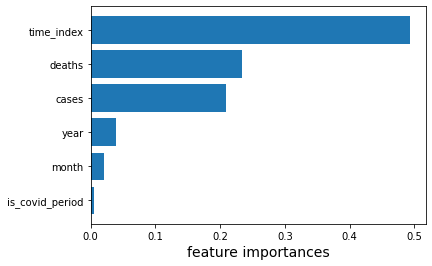

In [ ]:
plt.barh(features_df[::-1]['Feature'], features_df[::-1]['importance'])
plt.xlabel("feature importances", fontsize = 14)
plt.show()

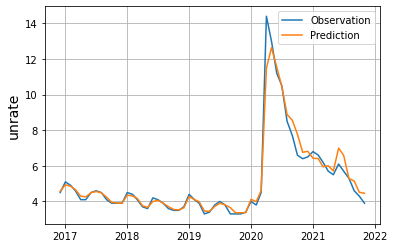

In [ ]:
unrate_pred = RF.predict(X)
plt.plot(df['date'], df['unrate'], label = 'Observation')
plt.plot(df['date'], unrate_pred, label = 'Prediction')
plt.legend()
plt.grid()
plt.ylabel("unrate", fontsize = 14)
plt.show()

* With the above Matplotlib graph, we can conclude that with a burst of unemployment rate during the beginning of 2020, the impact of the covid is decreasing as the time goes by until the end of 2022.

## Section 6: Summary

In my project of analyzing the unemployment rate during the pandemic of covid, I have divided the data analysis into 5 sections. In the first section, the data of unemployment rate and covid confirmed cases and death are loaded and cleaned using pandas. In the second section, Altair charts are conducted to visualize the correlation in the two specific years: 2020 and 2021. With the charts, we can conclude that 2020 is more influenced negatively by the covid pandemic than 2021. Then, in the next section, I have used the Random Forest Regression to find out whether the newly confirmed cases still matter that much as the aggregate cases do. The result shows the correlation is not that strong as time goes by. Last but not least, in section 5 Matplotlib is used to further visualize the section 4 correlation. With the last seaborn chart, we can make the conclusion of the diminishing impact on the unemployment rate from the covid during 2020 and 2021, and the positive proportional relationship between the cases and the unemployment rate.

## References

* Dataset rom Kaggle, the unemployment rate in the US: [US Un.Rate](https://www.kaggle.com/datasets/axeltorbenson/unemployment-data-19482021)

* Dataset from Kaggle, the Covid-19 confirmed cases in the US: [US Covid Data](https://www.kaggle.com/code/jennifersantiago/us-covid-19-eda-in-r/data)

* The tutorial for [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

* The tutorial for [Altair Chart with detail selection](https://altair-viz.github.io/gallery/select_detail.html)

* The tutorial for [Altair Chart with multi-Line tooltip](https://altair-viz.github.io/gallery/multiline_tooltip.html)

* The tutorial for [Matplotlib plots](https://seaborn.pydata.org/introduction.html)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2f991d47-f790-46cd-9bae-e75d3c0ecbd0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>